In [9]:
import pandas as pd 

df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.Message,df.Category,test_size=0.3, random_state=42)

In [27]:
X_train[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_test_count = v.transform(X_test)

In [31]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [32]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_count,  )
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1456
        spam       0.95      0.98      0.96       216

    accuracy                           0.99      1672
   macro avg       0.97      0.99      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [41]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'confusion_matrix')

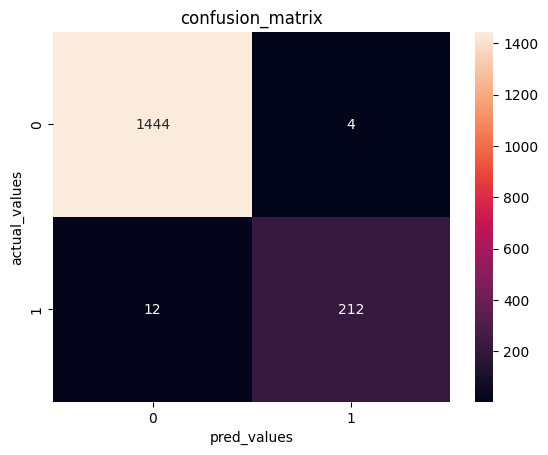

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("pred_values")
plt.ylabel("actual_values")
plt.title("confusion_matrix")

In [49]:
emails = [
    'hey mohan , can we have a meeting today at 7pm'
    'upto 20% discount on parking, exclusive offer for you. Dont miss the reward!'
]
emails_count = v.transform(emails)

model.predict(emails_count)

array(['ham'], dtype='<U4')